In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio

In [197]:
def gif_sol(Y,t):  
  filenames = []  
  for i in range(len(t)):    
    plt.title(f'Solucion a t = {t[i]}')
    plt.xlim([-1, 1])
    plt.plot(np.linspace(-1,1,len(Y[i])),Y[i],'o')
    # create file name and append it to a list
    filename = f'{i}.png'    
    for j in range(10):       
       filenames.append(filename)                 
    # save frame
    plt.savefig(filename)
    plt.close()  
  # build gif
  with imageio.get_writer('solution.gif', mode='I',duration=0.001) as writer:    
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)          
  # Remove files 
  for filename in set(filenames):    
    os.remove(filename)
def linear(x):
   sol = np.where((x<-1) | (x>1),0,1) * ((x+1)/2)
   return sol.reshape(len(x),1)
def solution(n,t):  
  sol = np.zeros(len(n))
  for i in range(len(n)):
    x = n[i]
    t_0 = t[0]
    lower = t_0 - 1
    uper = 1 - t_0    
    sol[i] = np.where((x<lower) | (x>uper),0,1) * 1/(2-2*t_0) 
  return sol
def simulacion(condicion_inicial,h):
  for i in range(len(condicion_inicial)):
    rand_pos = np.random.randint(0,len(condicion_inicial))
    if condicion_inicial[i] > condicion_inicial[rand_pos]:
        condicion_inicial[i] -= h
        condicion_inicial[rand_pos] += h
    if condicion_inicial[i] <= condicion_inicial[rand_pos]:
        condicion_inicial[i] += h
        condicion_inicial[rand_pos] -= h  
  return(condicion_inicial)  
def densidad(x):
   u = []
   dx = 2/len(x)
   for i in range(len(x)):
      u_dx = np.count_nonzero(np.where((x<(-1+(i*dx))) | (x> (-1+(i+1)*dx)),0,1))
      u.append(u_dx/len(x))
   return(u)

N es el numero de agentes. h es cuanto modifican la opinion en cada interaccion. nt es el numero de pasos temporales. 

In [246]:
N = 10000
h = 0.01
nt = 500
tiempo = np.linspace(0,1,nt)

Este es el primer caso con condicion inicial uniformemente distribuida.

In [247]:
agentes = np.random.uniform(-1,1,N)

x_agentes = []
dens = []
for i in range(len(tiempo)):    
    x_agentes.append(agentes.copy())
    dens.append(densidad(agentes).copy())    
    u = simulacion(agentes,h)
    agentes = u 

In [248]:
gif_sol(dens,tiempo)

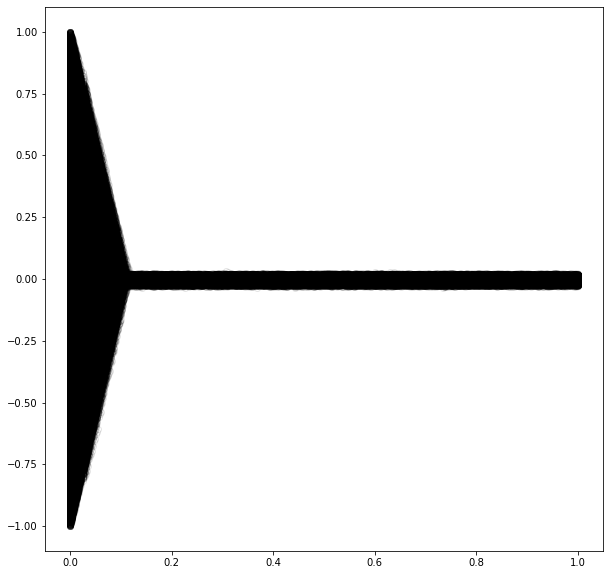

In [249]:
plt.figure(figsize=(10,10))
for i in range(len(tiempo)):
    plt.plot(tiempo[i] * np.ones(N),x_agentes[i],'ko',alpha = 0.1,fillstyle='none')
plt.show()

U es la p.d.f que me genera numeros con una distribucion lineal.

<ipython-input-250-667f2c5bbd89>:2: RuntimeWarning: invalid value encountered in sqrt
  U = -1 + (2 * np.sqrt(agentes))


(array([ 61., 184., 230., 372., 433., 614., 654., 766., 791., 942.]),
 array([-0.97504083, -0.77754474, -0.58004864, -0.38255254, -0.18505645,
         0.01243965,  0.20993575,  0.40743184,  0.60492794,  0.80242404,
         0.99992013]),
 <BarContainer object of 10 artists>)

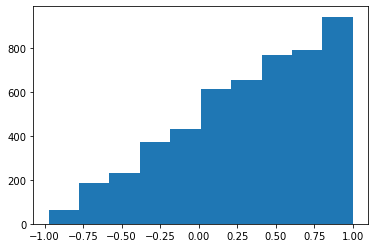

In [250]:
agentes = np.random.uniform(-1,1,N)
U = -1 + (2 * np.sqrt(agentes))
plt.hist(U)

In [251]:
x_agentes = []
dens = []
for i in range(len(tiempo)):    
    x_agentes.append(U.copy())
    dens.append(densidad(U).copy())    
    u = simulacion(U,h)
    U = u 

In [252]:
gif_sol(dens,tiempo)

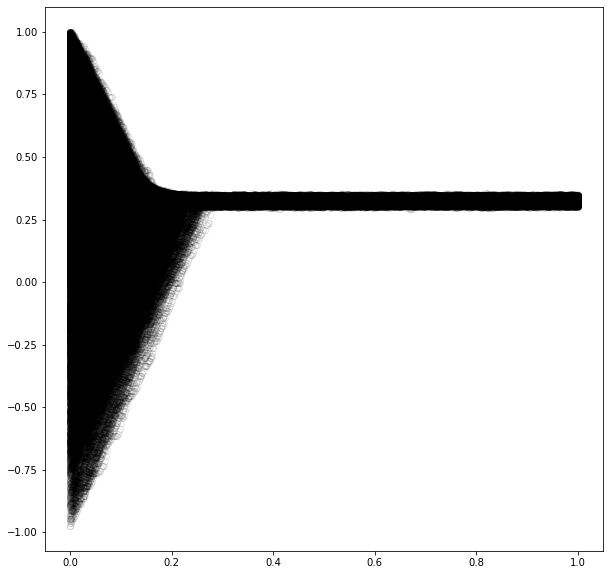

In [253]:
plt.figure(figsize=(10,10))
for i in range(len(tiempo)):
    plt.plot(tiempo[i] * np.ones(N),x_agentes[i],'ko',alpha = 0.1,fillstyle='none')
plt.show()